In [154]:
## Data Analysis ##
# EDA
import pandas as pd
import numpy as np
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.text as plttext
# Text Cleaning
import neattext.functions as nfx
# Counter
from collections import Counter


## Machine Learning ##
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [155]:
# Datasets
# Combination of all datasets from the following links:
#     https://github.com/google-research/google-research/tree/master/goemotions

In [156]:
# Cleaning the dataset
# Only need the text and the emotion
csv1 = pd.read_csv("../Data/google-research:goemotions/goemotions_1.csv")
csv2 = pd.read_csv("../Data/google-research:goemotions/goemotions_2.csv")
csv3 = pd.read_csv("../Data/google-research:goemotions/goemotions_3.csv")
# Combining datasets, droping missing values, creating emotion label
rawData = pd.concat([csv1, csv2, csv3], ignore_index=True)
rawData['emotion'] = ''
# There is a column called example_very_unclear, choosing to drop text completely
rawData.drop(rawData[rawData['example_very_unclear'] == True ].index, inplace = True)
# Getting all the emotion columns and assigning emotion based on boolean
emotionColumns = rawData.columns.tolist()[9:37]

for emotion in emotionColumns:
    rawData.loc[rawData[emotion] == 1, 'emotion'] = emotion

cleanData = rawData[['text', 'emotion']]
cleanData.to_csv("../Data/cleandata/text-emotion-dataset.csv", index=False)

<AxesSubplot:xlabel='emotion', ylabel='count'>

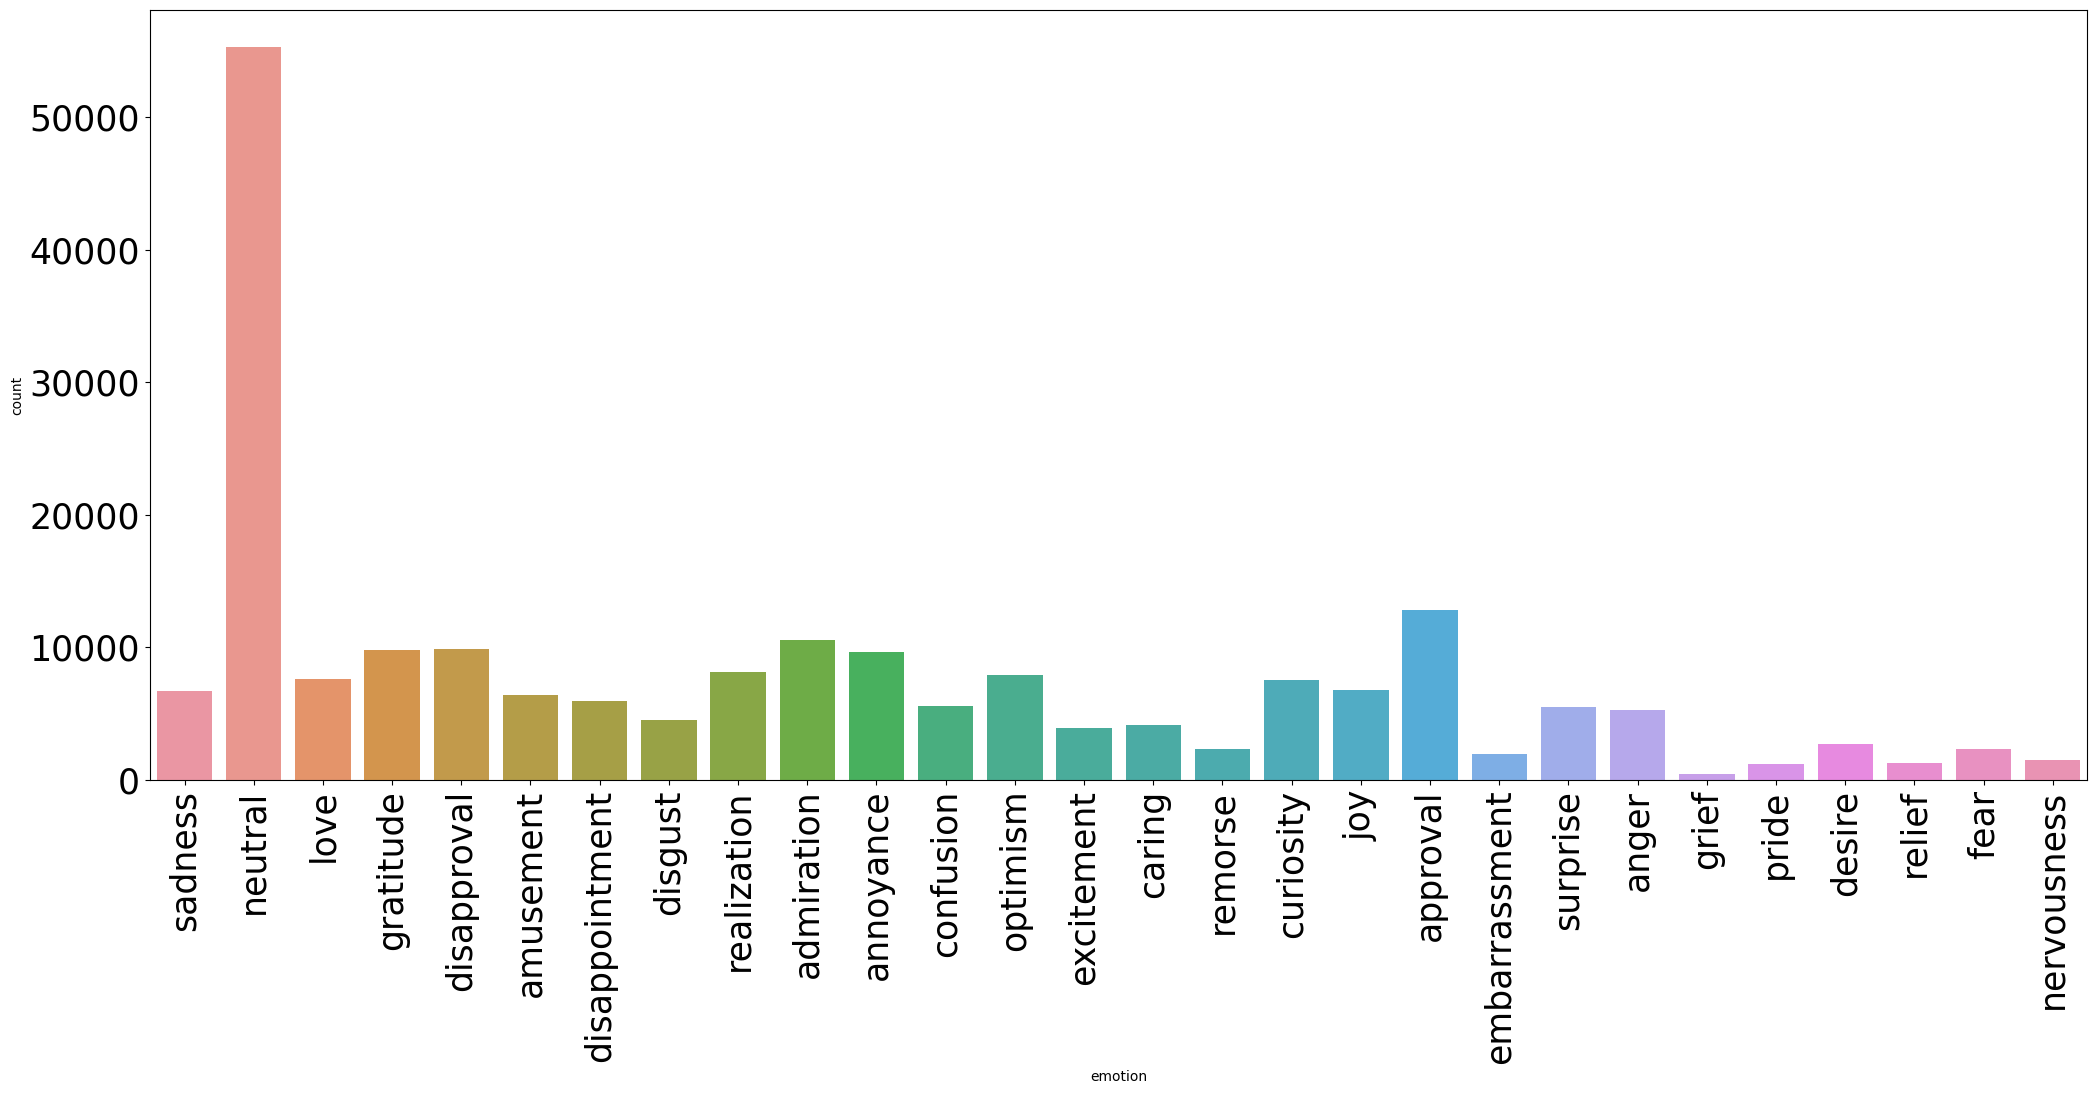

In [157]:
# Load data
data = pd.read_csv("../Data/cleandata/text-emotion-dataset.csv")
# Plot
plt.figure(figsize=(25,10))
plt.gca().tick_params(axis='y', labelsize=25)
plt.gca().tick_params(axis='x', rotation=90, labelsize=25)
sns.countplot(x="emotion", data=data)


In [158]:
# Cleaning text using neattext
data['text']

0                                           That game hurt.
1            You do right, if you don't care then fuck 'em!
2                                        Man I love reddit.
3         [NAME] was nowhere near them, he was by the Fa...
4         Right? Considering it’s such an important docu...
                                ...                        
207809    Well, I'm glad you're out of all that now. How...
207810                               Everyone likes [NAME].
207811    Well when you’ve imported about a gazillion of...
207812                                   That looks amazing
207813    The FDA has plenty to criticize. But like here...
Name: text, Length: 207814, dtype: object

In [159]:
# Removing user handles
data['text'] = data['text'].apply(nfx.remove_userhandles)

In [160]:
# Removing stop words
data['text'] = data['text'].apply(nfx.remove_stopwords)

In [161]:
# Removing stop words
data['text'] = data['text'].apply(nfx.remove_emojis)

In [162]:
data['text']

0                                                game hurt.
1                                     right, care fuck 'em!
2                                          Man love reddit.
3                                 [NAME] near them, Falcon.
4         Right? Considering it’s important document, kn...
                                ...                        
207809    Well, I'm glad now. awful. way act, think heal...
207810                                        likes [NAME].
207811    you’ve imported gazillion country it’s gets se...
207812                                        looks amazing
207813    FDA plenty criticize. like here, usually criti...
Name: text, Length: 207814, dtype: object

In [163]:
# Keyword Extraction

In [164]:
def ExtractKeywords(text, num=50):
    tokens = [ tok for tok in text.split()]
    mostCommonTokens = Counter(tokens).most_common(num)
    return dict(mostCommonTokens)

In [165]:
def PlotMostCommonWords(mydict, emotionName):
    dataframe = pd.DataFrame(mydict.items(),columns=["token", "count"])
    plt.figure(figsize=(20,10))
    plt.title("{} Common Keywords Plot".format(emotionName))
    sns.barplot(x="token", y="count", data=dataframe)
    plt.xticks(rotation=45)
    plt.show()

In [166]:
def GetMostCommonWords(emotionType, doPlot=False):
    emotionList = data[data["emotion"] == emotionType]["text"].tolist()
    keywordDict = ExtractKeywords(" ".join(emotionList))
    if doPlot:
        PlotMostCommonWords(keywordDict, emotionType)
    return keywordDict

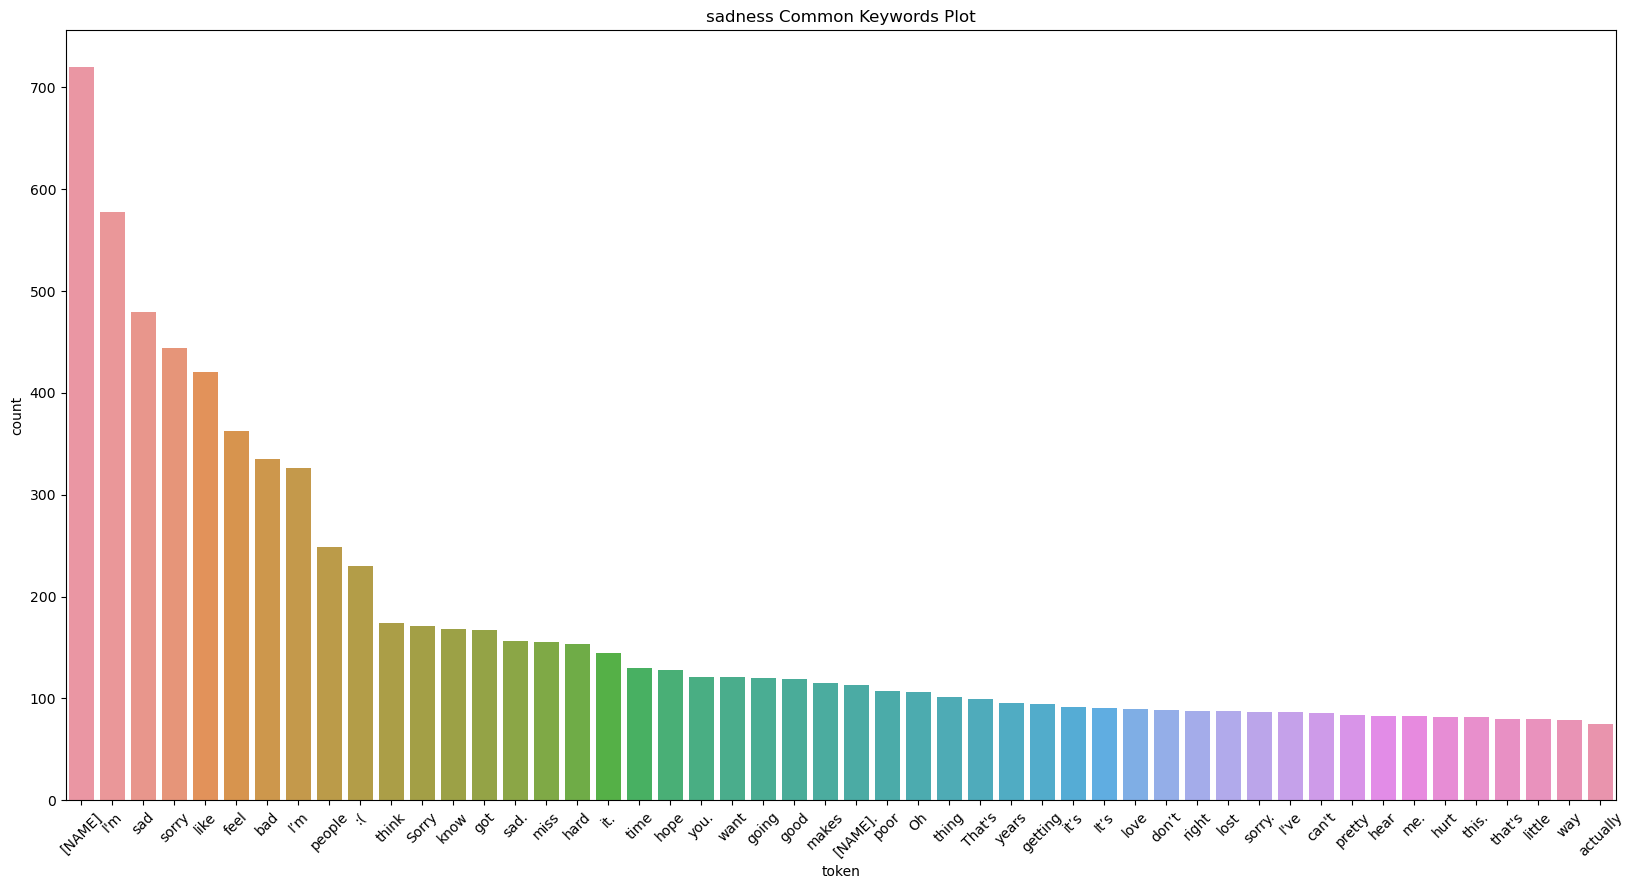

{'[NAME]': 720,
 "I'm": 578,
 'sad': 479,
 'sorry': 444,
 'like': 420,
 'feel': 363,
 'bad': 335,
 'I’m': 326,
 'people': 249,
 ':(': 230,
 'think': 174,
 'Sorry': 171,
 'know': 168,
 'got': 167,
 'sad.': 156,
 'miss': 155,
 'hard': 153,
 'it.': 145,
 'time': 130,
 'hope': 128,
 'you.': 121,
 'want': 121,
 'going': 120,
 'good': 119,
 'makes': 115,
 '[NAME].': 113,
 'poor': 107,
 'Oh': 106,
 'thing': 101,
 "That's": 99,
 'years': 95,
 'getting': 94,
 'it’s': 92,
 'It’s': 91,
 'love': 90,
 'don’t': 89,
 'right': 88,
 'lost': 88,
 'sorry.': 87,
 "I've": 87,
 "can't": 86,
 'pretty': 84,
 'hear': 83,
 'me.': 83,
 'hurt': 82,
 'this.': 82,
 "that's": 80,
 'little': 80,
 'way': 79,
 'actually': 75}

In [167]:
emotionList = data['emotion'].unique().tolist()
GetMostCommonWords("sadness", True)